#### _Коэффициент Шарпа_
-------------------------------------------------------
В основе разумного инвестирования лежит не одна или несколько ценных бумаг, а инвестиционный портфель.
Можно создать множество инвестиционных портфелей, и каждый из них будет иметь свои параметры риска (волатильности) и доходности. Для выделения из этого множества наилучшего, их можно сравнить между собою с помощью одного из инструментов оценки портфеля - **коэффициент Шарпа**.  
Будущая доходность актива является случайной величиной и равна ее математическому ожиданию **M[X]**, а риск – это дисперсия **D[X]**, т.е. разброс цен на акцию. Чем выше этот разброс - волатильность курса, тем больше риск.Риск (волатильность) принимают равным среднеквадратичному отклонению **(𝜎)** доходностей за тот же интервал.  
**Коэффициент Шарпа** позволяет решить задачу сравнения портфелей с разными значениями риска и доходности довольно просто – путем сравнения безрисковым активом. Для этого из будущей доходности рассматриваемого актива вычитается доходность актива безрискового, а результат делится на риск, т.е. дисперсию равную стандартному (среднеквадратичному) отклонению доходностей. Полученный результат показывает величину доходности сверх безрисковой, которая приходится на единицу риска. 


In [162]:
import pandas as pd
import numpy as np

In [163]:
returns_percent = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                      index_col=0, parse_dates=True, header=0, na_values=-99.99)

+ Набор данных представляет из себя доходность портфелей с 1926 по 2018 год.
+ Портфели сгруппированы из общего набора относительно капитализаций (стоимости), 
    1. Группировка по трем портфелям Lo 30, Med 40, Hi 30
    2. Группировка по пяти портфелям Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20
    3. Группировка по десяти портфелям Lo 10, Dec 2, ..., ..., ..., Hi 10


In [179]:
returns_percent

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


+ Буду сравнивать только два портфеля **'Lo 10', 'Hi 10'**

In [180]:
returns_fractions = returns_percent[['Lo 10', 'Hi 10']] / 100
returns_fractions.head(3)

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067


<AxesSubplot:>

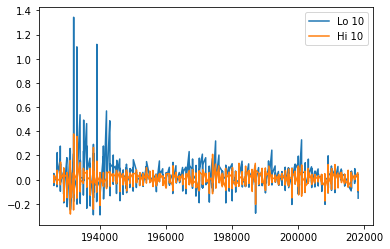

In [166]:
# look at the volatility plot
returns_fractions.plot.line()

In [167]:
# standard deviation (volatility)
returns_std = returns_fractions.std()
returns_std

Lo 10    0.106288
Hi 10    0.053900
dtype: float64

#### Checking  of  calculate  the  standart  deviation :

$ {\color{blue}{\overline{x}}} = \frac{1}{n} \sum_{i=1}^{n}(x_i) \;$
$ \qquad \qquad \quad - {M[X]}$      

$ {\color{green}{\sigma^2}} = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i -  {\color{blue}{\overline{x}}})^2$
$ \qquad  - {D[X]}$

$ \sigma = \sqrt { \color{green}{\sigma^2} }$
$ \qquad\qquad\qquad\quad  - {std.} $

In [168]:
deviations = returns_fractions - returns_fractions.mean()
variance = (deviations**2).sum() / (returns_fractions.shape[0] - 1)
volatility = np.sqrt(variance)
volatility

Lo 10    0.106288
Hi 10    0.053900
dtype: float64

In [169]:
returns_std[0].round(6) == volatility[0].round(6) and returns_std[1].round(6) == volatility[1].round(6)

True

In [170]:
# annualized volatility
annualized_vol = returns_std * np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [171]:
# total income 
np.prod(returns + 1) - 1 

Lo 10    1.659582e+06
Hi 10    3.674948e+03
dtype: float64

In [172]:
# monthly income
num_months = returns_fractions.shape[0]
return_per_month = (returns + 1).prod() ** (1 / num_months) - 1
print('num_months: ' + str(num_months))
return_per_month

num_months: 1110


Lo 10    0.012986
Hi 10    0.007423
dtype: float64

In [173]:
# annual income
annualized_return = (return_per_month + 1) ** 12 - 1
annualized_return

Lo 10    0.167463
Hi 10    0.092810
dtype: float64

In [174]:
# относительная доходность на единицу волатильности (риска)
annualized_return / annualized_vol

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

In [176]:
# статическая безрисковая доходность (вообще нужно брать временной ряд безрисковой ставки)
riskfree_ratre = 0.03

In [178]:
# Коэффициент Шарпа
sharpe_ratio = (annualized_return - riskfree_ratre) / annualized_vol
sharpe_ratio

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

##### Вывод:
---------------------------------------
Чем выше коэффициент Шарпа, тем больший доход будет получен на единицу риска и тем более выгоден портфель.  
У портфеля **Lo 10** - доходность на единицу риска больше.